#### Getting Started
We will be using TensorFlow and  Keras for data augmentation and matplotlib for displaying the images.

In [1]:
from glob import glob
import pandas as pd
import cv2
from scripts.visualization import Visualization
import matplotlib.pyplot as plt
import numpy as np

#### Reading Data

In [2]:
# Path to all data
data_dir = './lgg-mri-segmentation/kaggle_3m'

# img size
IMG_SIZE = 512

In [3]:
images_paths = []
masks_paths = glob(f'{data_dir}/*/*_mask*')

for i in masks_paths:
    images_paths.append(i.replace('_mask', ''))

df = pd.DataFrame(data= {'images_paths': images_paths, 'masks_paths': masks_paths})
df.head()

,images_paths,masks_paths
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...


In [4]:
def pos_neg_diagnosis(masks_paths):
    value = np.max(cv2.imread(masks_paths))
    if value > 0 :
        return 1
    else:
        return 0

df['label'] = df['masks_paths'].apply(lambda x: pos_neg_diagnosis(x))
df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
...,...,...,...
3924,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3925,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3926,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3927,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0


#### Data Distribution

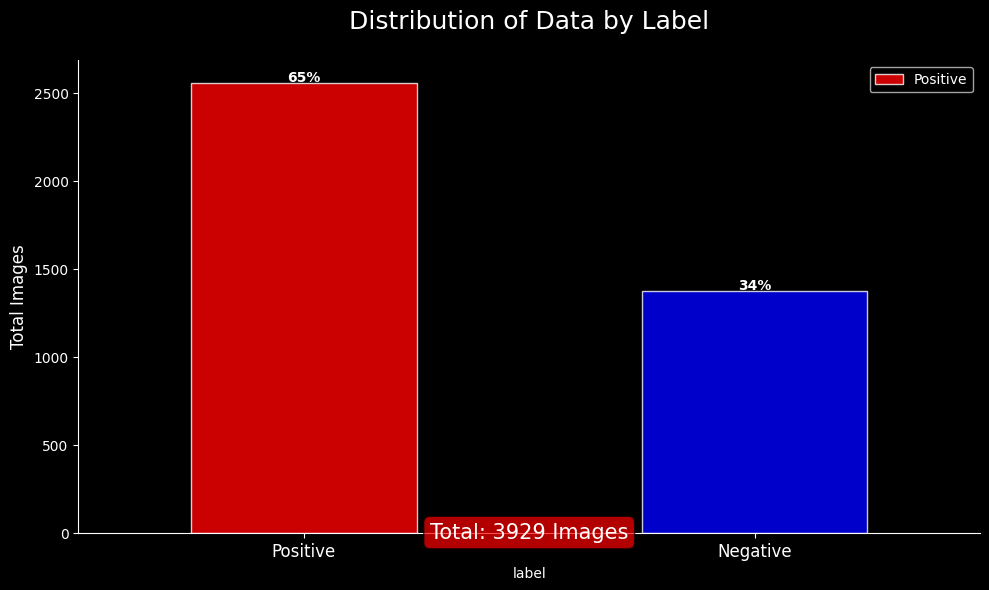

In [5]:
visualization = Visualization(df)
visualization.plot_distribution_grouped_by_label()

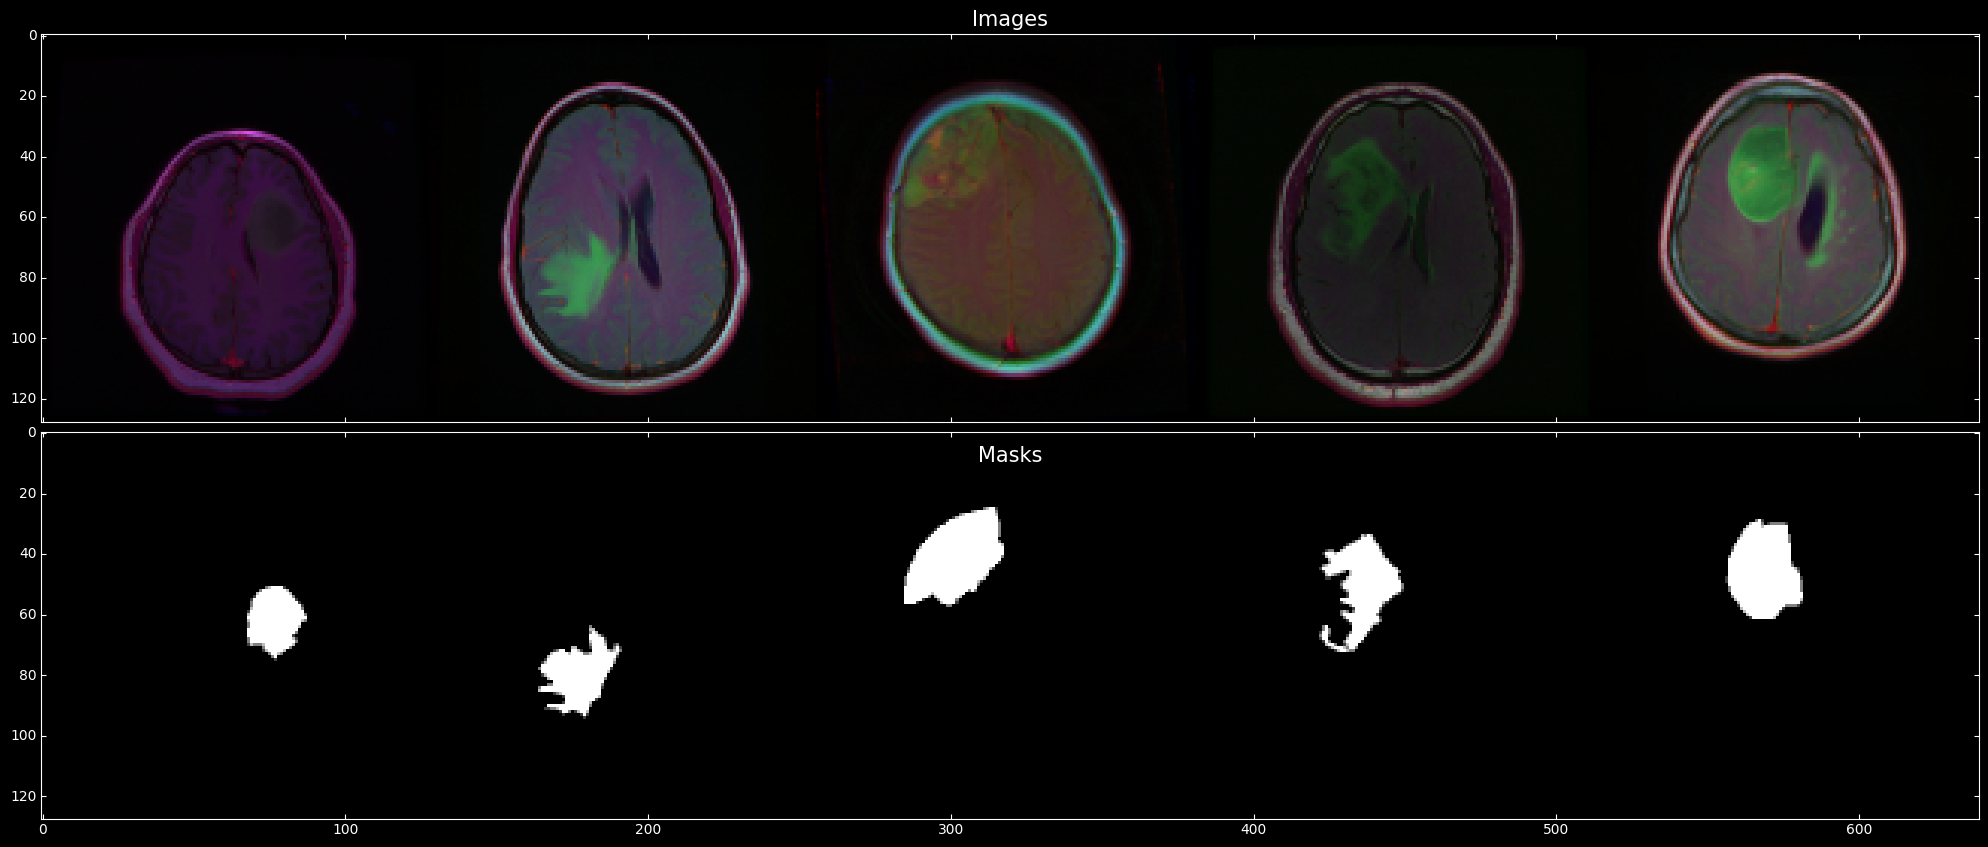

In [6]:
visualization = Visualization(df)
visualization.plot_images_and_masks()

#### Data Loading

In the code below, we have loaded 80% training, 10% validation, and a 10% test set with labels and metadata.

In [7]:
mask_df = df[df['label'] == 1]
mask_df.shape

(1373, 3)

In [8]:
from sklearn.model_selection import train_test_split
# Split df into train_df and val_df
train_df, val_df = train_test_split(mask_df, stratify=mask_df.label, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
val_df, test_df = train_test_split(val_df, stratify=val_df.label, test_size=0.3)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# train_df = train_df[:1000]
print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (1235, 3) 
Val: (96, 3) 
Test: (42, 3)


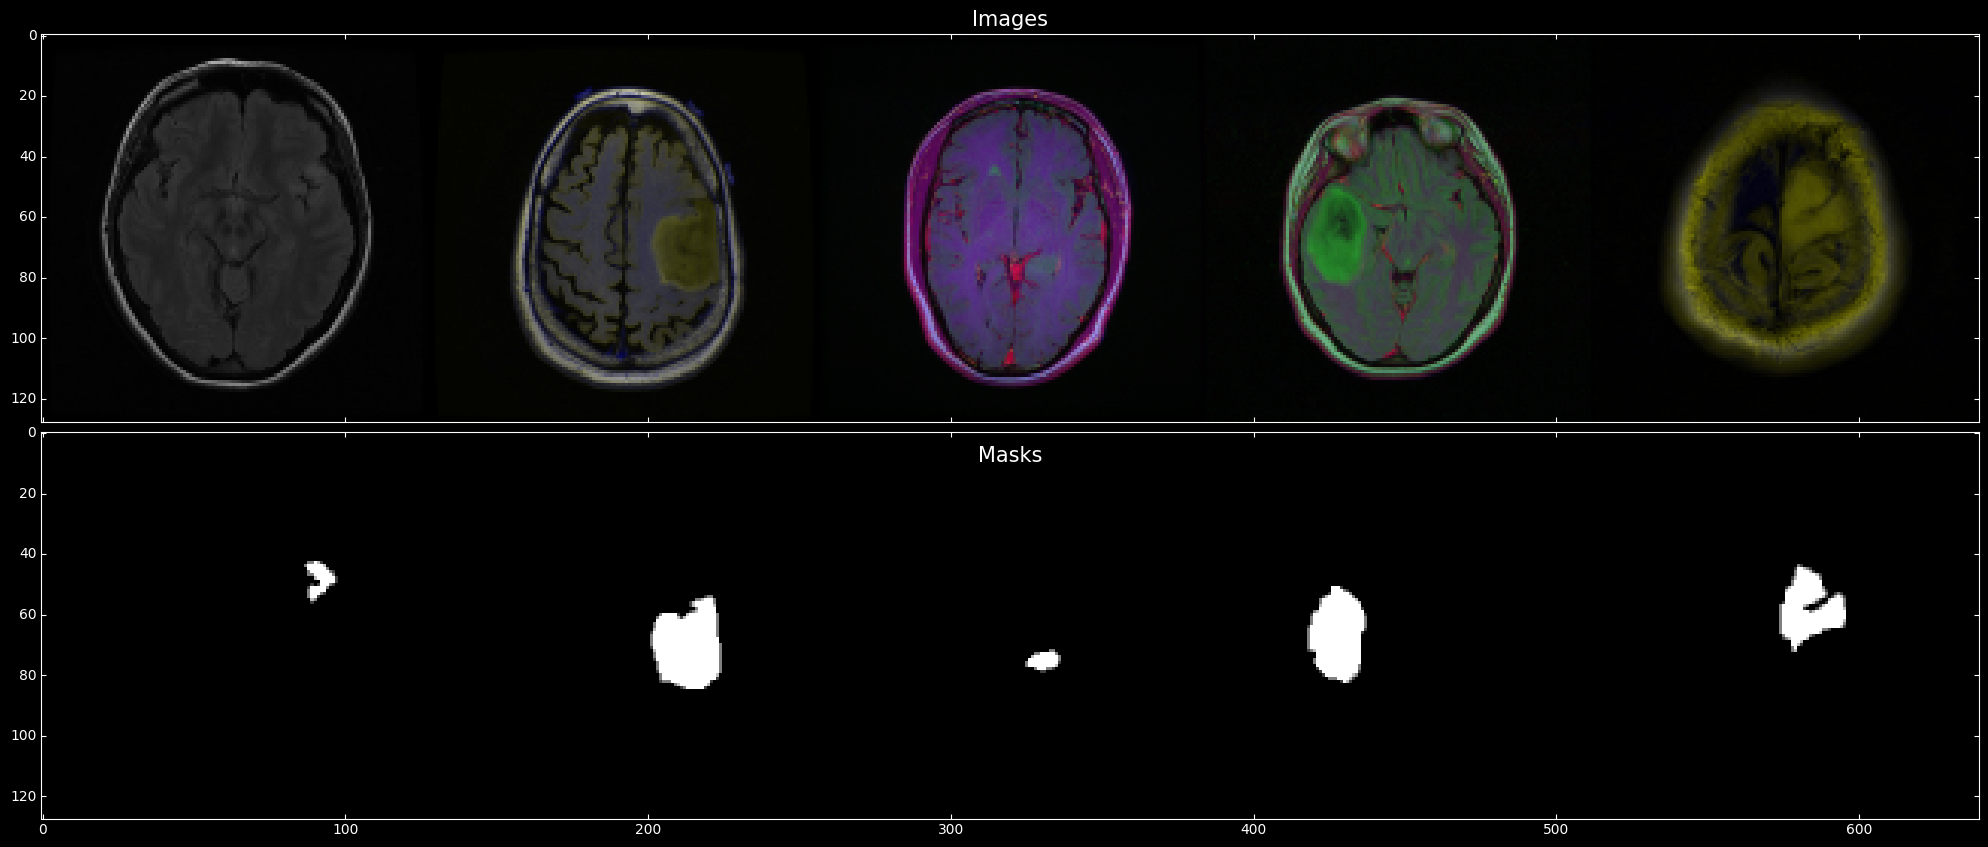

In [9]:
visualization = Visualization(train_df)
visualization.plot_images_and_masks()

#### GAN

In [10]:
train_df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_6408_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_6408_...,1
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_...,1
2,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8106_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8106_...,1
3,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7306_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7306_...,1
4,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A4MT_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A4MT_...,1
...,...,...,...
1230,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_7643_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_7643_...,1
1231,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_7634_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_7634_...,1
1232,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TP_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TP_...,1
1233,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8113_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8113_...,1


In [11]:
from scripts.brain_mri_dataset import BrainMriDataset
from torch.utils.data import DataLoader
IMG_SIZE = 64
BATCH_SIZE = 26

# train
train_dataset = BrainMriDataset(df=train_df, img_size=IMG_SIZE)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

# val
val_dataset = BrainMriDataset(df=val_df, img_size=IMG_SIZE)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

#test
test_dataset = BrainMriDataset(df=test_df, img_size=IMG_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

In [12]:
images, masks, labels = next(iter(train_dataloader))

In [13]:
print(images.shape, masks.shape)

torch.Size([26, 64, 64, 3]) torch.Size([26, 64, 64, 3])


In [14]:
print(images[0].shape, masks[0].shape)

torch.Size([64, 64, 3]) torch.Size([64, 64, 3])


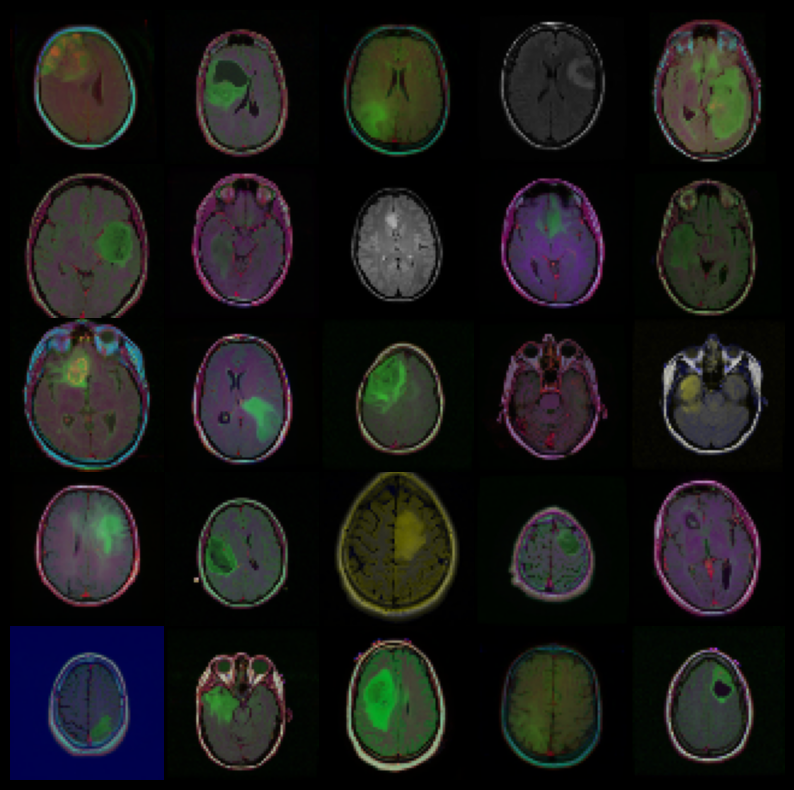

In [15]:
visualization = Visualization(train_df)
visualization.plot_images(images)

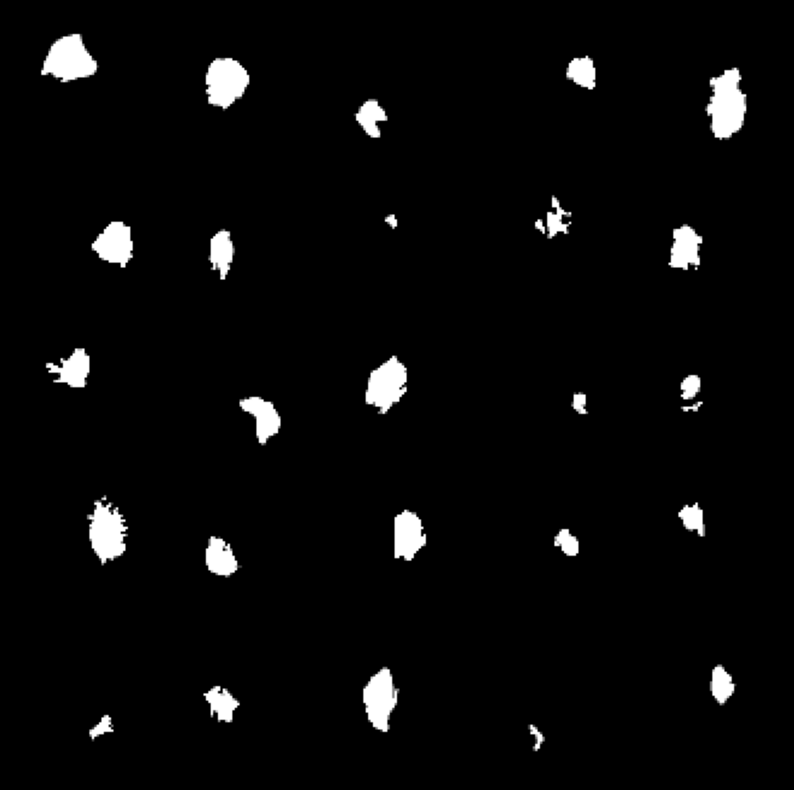

In [16]:
visualization.plot_images(masks)

In [17]:
from scripts.gan import SimpleGAN

# Instantiate and train the GAN
gan = SimpleGAN(img_size=IMG_SIZE)

Metal device set to: Apple M1 Pro
Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Discriminator-Hidden-Layer-  (None, 32, 32, 64)       3136      
 1 (Conv2D)                                                      
                                                                 
 Discriminator-Hidden-Layer-  (None, 32, 32, 64)       0         
 Activation-1 (LeakyReLU)                                        
                                                                 
 Discriminator-Hidden-Layer-  (None, 16, 16, 128)      131200    
 2 (Conv2D)                                                      
                                                                 
 Discriminator-Hidden-Layer-  (None, 16, 16, 128)      0         
 Activation-2 (LeakyReLU)                                        
                                                                 
 Discriminator-Hidd

In [18]:
gan.train(images, epochs=1000, batch_size=128)

Models are already loaded. Training skipped.


In [19]:
# Generate synthetic images
num_images = 16
generated_images = gan.generate_images(num_images)

1/1 [==============================] - 0s 81ms/step


2023-09-04 20:32:45.754099: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [20]:
def display_images(images):
    fig, axs = plt.subplots(4, 4)
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow((images[count] * 0.5) + 0.5)
            axs[i, j].axis('off')
            count += 1
    plt.show()

In [21]:
# Display a few samples from the dataset

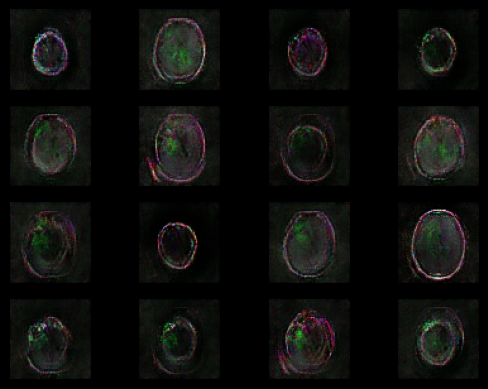

In [22]:
# Display the generated images
display_images(generated_images)

In [23]:
print(generated_images.shape)

(16, 64, 64, 3)


In [24]:
test_images, test_masks, test_labels = next(iter(test_dataloader))

# Model evaluation

In [25]:
gan.evaluate_discriminator(test_images)

ValueError: `y` argument is not supported when using dataset as input.

In [ ]:
gan.plot_real_vs_fake(test_images, 1000, 4)

In [ ]:
gan.plot_real_vs_fake(test_images, 1000, 6)

In [ ]:
gan.plot_losses()

# Brain Cancer Classifier

In [ ]:
from scripts.brain_cancer_classifier import BrainCancerClassifier

#### Based on real images

In [ ]:
classifier = BrainCancerClassifier(train_dataloader, val_dataloader)

In [ ]:
classifier.train()

#### Based on fake images